# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [4]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [5]:
import mnist

In [6]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [7]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [8]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [9]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


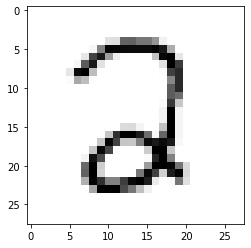

In [10]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [11]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [12]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [13]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [14]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [15]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [16]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [17]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [18]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [19]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [20]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [21]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [22]:
learner1.train_loop(dl)

Epoch 0 Loss 0.24570383249582084
train accuracy is: 0.5307127357703222, test accuracy is 0.5277217741935484
Epoch 10 Loss 0.10688307708465926
train accuracy is: 0.9162076448005342, test accuracy is 0.9188508064516129
Epoch 20 Loss 0.06163266204429868
train accuracy is: 0.9367384409948256, test accuracy is 0.9420362903225806
Epoch 30 Loss 0.04788181982308983
train accuracy is: 0.9455015857119012, test accuracy is 0.9551411290322581
Epoch 40 Loss 0.04130951017556479
train accuracy is: 0.9518444333166416, test accuracy is 0.9611895161290323
Epoch 50 Loss 0.037387527583941524
train accuracy is: 0.9553496912034719, test accuracy is 0.9647177419354839
Epoch 60 Loss 0.03471206907851187
train accuracy is: 0.9590218661325322, test accuracy is 0.9652217741935484
Epoch 70 Loss 0.03271153389501123
train accuracy is: 0.9615256217659823, test accuracy is 0.9657258064516129
Epoch 80 Loss 0.031149134730335783
train accuracy is: 0.9631947921882824, test accuracy is 0.9667338709677419
Epoch 90 Loss 0.02

0.006422577103880384

##### Now running only the logistic regression based classification to compare results with NN

In [24]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [25]:
learner2.train_loop(dl)

Epoch 0 Loss 0.20964738595224913
train accuracy is: 0.772074778834919, test accuracy is 0.7736895161290323
Epoch 10 Loss 0.10030624642536608
train accuracy is: 0.9091136705057586, test accuracy is 0.9269153225806451
Epoch 20 Loss 0.07859426364924561
train accuracy is: 0.9274745451510599, test accuracy is 0.9430443548387096
Epoch 30 Loss 0.06809828393908661
train accuracy is: 0.9366549824737106, test accuracy is 0.9485887096774194
Epoch 40 Loss 0.06165100604607659
train accuracy is: 0.941662493740611, test accuracy is 0.954133064516129
Epoch 50 Loss 0.05720744284787042
train accuracy is: 0.9448339175429812, test accuracy is 0.9576612903225806
Epoch 60 Loss 0.05392018661257622
train accuracy is: 0.9476715072608913, test accuracy is 0.9616935483870968
Epoch 70 Loss 0.05136582085617001
train accuracy is: 0.9495075947254215, test accuracy is 0.9637096774193549
Epoch 80 Loss 0.04931468404600651
train accuracy is: 0.9500918043732265, test accuracy is 0.9647177419354839
Epoch 90 Loss 0.0476186

0.041801527664563465

### Comparing results of NN and LR

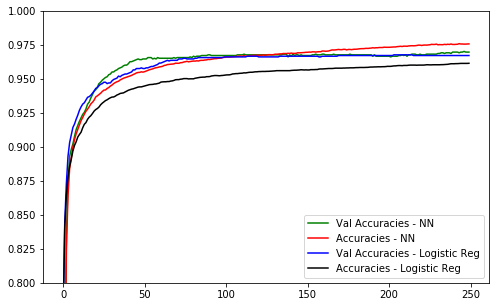

In [146]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [79]:
model_new = Model(layers[:-2])

In [81]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

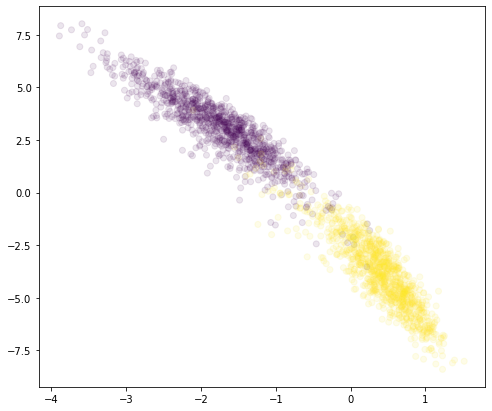

In [161]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [148]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [169]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

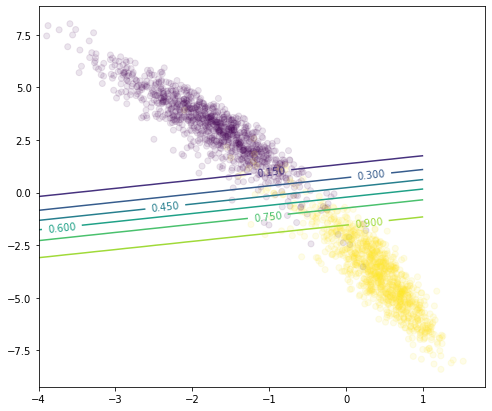

In [170]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );